<a href="https://colab.research.google.com/github/marcocaramanti/MLPNS_MCaramanti/blob/main/CentralLimitTheorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Central limit theorem


In [5]:
from __future__ import print_function
__author__= "Marco Caramanti"

import pylab as pl
import numpy as np
import scipy as sp
from scipy import stats
from scipy.optimize import curve_fit, minimize
import seaborn
# Pacchetto con tanti stili

seaborn.set_style("darkgrid")

In [7]:
np.random.seed(456)
mymean = 100
# Useremo sempre questa media per tutte le distribuzioni che creiamo

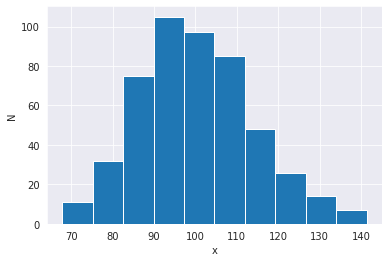

In [10]:
# Settiamo i parametri delle distribuzioni in modo da avere mymean come media
df = mymean # chi2
p = 0.5 # binomial
n = mymean / p #binomial

# Usiamo una nuova struttura: il dizionario
# Il dizionario è simile a un pandas dataframe: possiede valori associati a
# nomi (keyword), a differenza di liste dove importa l'ordine
# I nomi possono essere quello che vogliamo, non necessariamente strings.

mydist = {}

pl.hist(np.random.chisquare(mymean, size=500));
# Il return value è un array con i valori dei bins sull'asse x e i conteggi
# sull'asse y
pl.ylabel("N")
pl.xlabel("x");


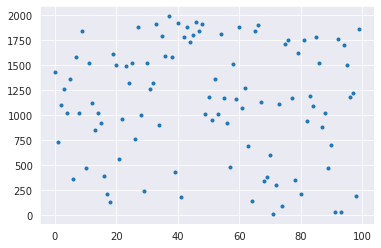

In [27]:
# Abbiamo fatto una distribuzione. Ma noi ne vogliamo fare 100
# Una strategia è prima creare un array con le dimensioni delle distribuzioni,
# poi usare quell'array.

mysize = (np.random.rand(100) * 2000).astype(int) # Serve per avere int
mysize[mysize < 10] = 10 # Facciamo in modo da non avere valori minori di 10
pl.plot(mysize, '.'); # Per controllare

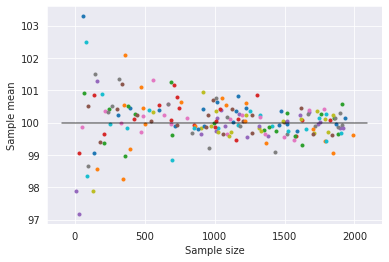

In [33]:
for s in mysize:
  mydist[s] = np.random.chisquare(mymean, size=s)
  # Mettiamo tutto dentro un dizionario. Le keyword sono numeri e sono le 
  # dimensioni delle distribuzioni. Per ogni keyword ci sono varie distr.


ax = pl.figure().add_subplot(111)

for d in mydist.keys():
  ax.plot(d, mydist[d].mean(), '.')

ax.plot(pl.xlim(), [100, 100], 'k', alpha=0.5)
# Valore di aspettazione sulla base del teorema del limite centrale
ax.set_xlabel("Sample size")
ax.set_ylabel("Sample mean");

# Notiamo che c'è più varianza per distribuzioni piccole.

# Per ricostruire meglio come i valori medi tendono al valore previsto dal
# teorema del limite centrale, prendiamo più punti per N piccolo. Come fare?